In [1]:
import sys
import cv2 as cv
import math
import numpy as np
import matplotlib.pyplot as plt
import imutils
from math import sqrt,exp

(0.0, 1.0, 0.0, 1.0)

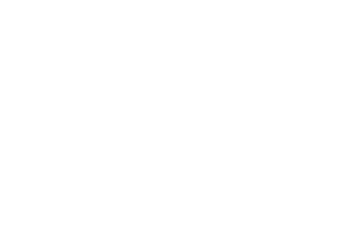

In [2]:
plt.axis("off")

In [3]:
'''
    Написати програму яка шукає шаблон на зображені наступним чином 
    Підготовка
    1 - перетворює зображення на ЧБ.
    2 - знаходить контури на зображенні (canny)
    3 - будує матрицю M, елементами якої є манхетенська відстань до найближчого контуру
    Шаблон
    Шаблоном є бінарне зображення пікселі якого 1 або 0
    Пошук
    Результатом пошуку є така позиція шаблону на матриці, що сума всіх елементів M які відповідають 1 в шаблоні, була мінімальною.

'''

'\n    Написати програму яка шукає шаблон на зображені наступним чином \n    Підготовка\n    1 - перетворює зображення на ЧБ.\n    2 - знаходить контури на зображенні (canny)\n    3 - будує матрицю M, елементами якої є манхетенська відстань до найближчого контуру\n    Шаблон\n    Шаблоном є бінарне зображення пікселі якого 1 або 0\n    Пошук\n    Результатом пошуку є така позиція шаблону на матриці, що сума всіх елементів M які відповідають 1 в шаблоні, була мінімальною.\n\n'

In [4]:
#Пошук

def simplefindPos(MImage, edgesTemplate):
    dotsTemplate = np.argwhere(np.array(edgesTemplate) == 255)
    if (len(MImage)<len(edgesTemplate)) or (len(MImage[0])<len(edgesTemplate[0])):
        return 999999999,[]

    edgesRows = len(edgesTemplate)
    edgesCols = len(edgesTemplate[0])

    rows = len(MImage)
    cols = len(MImage[0])

    minSum = 1000000000
    minSumX = 0
    minSumY = 0

    for row in range(rows):
        for col in range(cols):
            if edgesRows+row>=rows or edgesCols+col>=cols:
                continue
            sum=0
            for xy in dotsTemplate:
                sum+=MImage[xy[0]+row][xy[1]+col]
                if minSum< sum:
                    break
            if minSum> sum:
                minSum = sum
                minSumX = row
                minSumY = col

    posMatrix=[[0 for i in range(cols)] for j in range(rows) ]
    for xy in dotsTemplate:
        posMatrix[xy[0]+minSumX][xy[1]+minSumY]=255

    return {"minSum":minSum, "x":minSumX,"y":minSumY}, posMatrix

In [5]:
#будує матрицю M, елементами якої є манхетенська відстань до найближчого контуру
def getM(edges):
    rows = len(edges)
    cols = len(edges[0])
    
    M = [[rows+cols+1 for i in range(cols)] for i in range(rows) ]

    dots = np.argwhere(np.array(edges) ==255)

    for el in dots:
        for irow in range(rows):
            for icol in range(cols): 
                if M[irow][icol]> abs((irow-el[0]))+abs((icol-el[1])):
                    M[irow][icol]= abs((irow-el[0]))+abs((icol-el[1]))

    return M

In [6]:
#завантажує зображення
def loadImage(name):
    return cv.imread(name)

In [7]:
def loadTemplate(name):
    template = cv.imread(name)
    templateBW = imageBlackandWhite(template)
    return getEdges(templateBW,100,200)

In [8]:
#знаходить контури на зображенні (canny)
def getEdges(img, minP, maxP):
    return cv.Canny(img,minP,maxP)

In [9]:
#перетворює зображення на ЧБ
def imageBlackandWhite(image):

    grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    (thresh, blackAndWhiteImage) = cv.threshold(grayImage, 127, 255, cv.THRESH_BINARY)
    
    return grayImage

In [10]:
def connect(image1, template1Pos, template1Sum, template1):
    rows = len(image1)
    cols = len(image1[0])

    image1template1 = [[0 for i in range(cols)] for i in range(rows) ]

    for row in range(rows):
        for col in range(cols):
            if template1Pos[row][col]==255:
                image1template1[row][col]=[255,0,0]
            else:
                image1template1[row][col]=image1[row][col]
    for x in range(len(template1)):
        image1template1[template1Sum['x']+x][template1Sum['y']]=[0,0,255]
        image1template1[template1Sum['x']+x][template1Sum['y']+len(template1[0])-1]=[0,0,255]
    for y in range(len(template1[0])):
        image1template1[template1Sum['x']][template1Sum['y']+y]=[0,0,255]
        image1template1[template1Sum['x']+len(template1)-1][template1Sum['y']+y]=[0,0,255]
        
    return image1template1

In [11]:
image1 = loadImage("image1.png")

In [12]:
image1BW = imageBlackandWhite(image1)

In [13]:
image1Edges = getEdges(image1BW,100,200)

In [14]:
image2 = loadImage("image2.png")

In [15]:
image2BW = imageBlackandWhite(image2)

In [16]:
image2Edges = getEdges(image2BW,100,200)

In [17]:
print(image1)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Text(0.5, 1.0, 'Image 1')

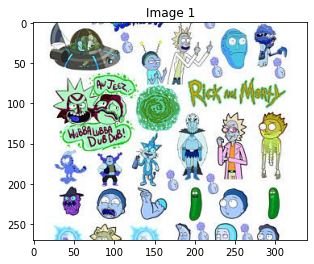

In [18]:
plt.imshow(image1)
plt.title('Image 1')

Text(0.5, 1.0, 'Image BW 1')

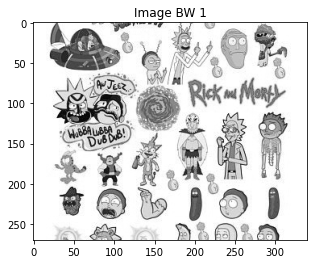

In [19]:
plt.imshow(image1BW, "gray")
plt.title('Image BW 1')

Text(0.5, 1.0, 'Image Edges 1')

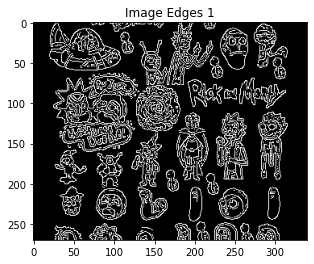

In [20]:
plt.imshow(image1Edges, "gray")
plt.title('Image Edges 1')

In [21]:
print(image2)

[[[128 115 193]
  [128 115 193]
  [128 115 193]
  ...
  [138 124 218]
  [138 124 218]
  [138 124 218]]

 [[128 115 193]
  [128 115 193]
  [128 115 193]
  ...
  [138 124 218]
  [138 124 218]
  [138 124 218]]

 [[128 115 193]
  [128 115 193]
  [128 115 193]
  ...
  [138 124 218]
  [138 124 218]
  [138 124 218]]

 ...

 [[ 95 114   0]
  [ 97 111   6]
  [102 110  17]
  ...
  [199 142 127]
  [ 98  89  25]
  [ 92 120   7]]

 [[125 131  22]
  [124 135  11]
  [122 138   1]
  ...
  [177 110 142]
  [ 90  74  32]
  [105 123   6]]

 [[133 136  20]
  [135 138  22]
  [136 143  22]
  ...
  [159 113  95]
  [ 96  98   2]
  [128 155   0]]]


Text(0.5, 1.0, 'Image 2')

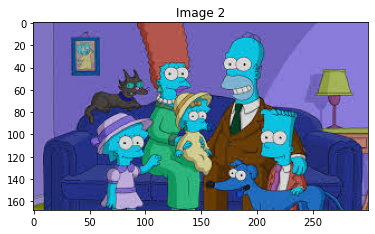

In [22]:
plt.imshow(image2)
plt.title('Image 2')

Text(0.5, 1.0, 'Image BW 2')

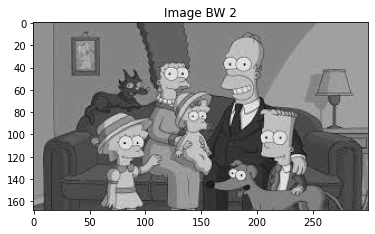

In [23]:
plt.imshow(image2BW, "gray")
plt.title('Image BW 2')

Text(0.5, 1.0, 'Image Edges 2')

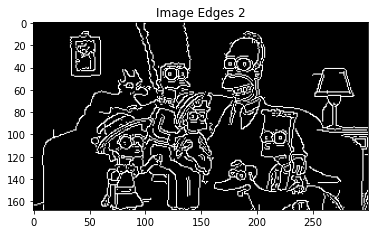

In [24]:
plt.imshow(image2Edges, "gray")
plt.title('Image Edges 2')

In [ ]:
image1M = getM(image1Edges)

In [25]:
image2M = getM(image2Edges)

In [41]:
with open('image1M.npy', 'wb') as f:
    np.save(f, np.array(image1M))

In [42]:
with open('image2M.npy', 'wb') as f:
    np.save(f, np.array(image2M))

In [25]:
with open('image1M.npy', 'rb') as f:
    image1M = np.load(f).tolist()

In [26]:
with open('image2M.npy', 'rb') as f:
    image2M = np.load(f).tolist()

Text(0.5, 1.0, 'image1M')

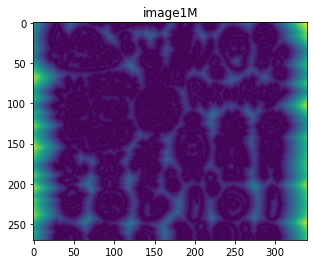

In [27]:
plt.imshow(image1M)
plt.title('image1M')

Text(0.5, 1.0, 'image2M')

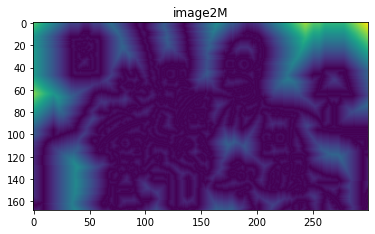

In [28]:
plt.imshow(image2M)
plt.title('image2M')

In [29]:
print(image1M)

[[28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 16, 15, 14, 13, 12, 11, 11, 10, 9, 9, 9, 9, 8, 8, 8, 7, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 2, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 3, 3, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 0, 1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 11, 10, 9, 9, 8, 8, 8, 8, 7, 7, 7, 8, 8, 8, 9, 9, 10, 10, 11, 12, 12, 13, 14, 14, 15, 15, 16, 17, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 5, 4, 3, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1

In [30]:
print(image2M)

[[46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 13, 13, 13, 13, 13, 13, 13, 12, 11, 10, 9, 8, 8, 8, 8, 8, 9, 10, 11, 12, 13, 13, 13, 13, 13, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 19, 18, 17, 16, 16, 15, 14, 13, 12, 11, 10, 10, 9, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 53, 52, 51, 50, 49, 48, 47, 46, 46, 46, 46, 46, 46, 45, 44, 43, 42, 41, 41, 41, 4

In [29]:
template1 = loadTemplate("template1.png")

In [30]:
template2 = loadTemplate("template2.png")
template3 = loadTemplate("template3.png")
template4 = loadTemplate("template4.png")

Text(0.5, 1.0, 'Template 1')

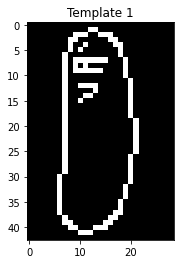

In [31]:
plt.imshow(template1, "gray")
plt.title('Template 1')

Text(0.5, 1.0, 'Template 2')

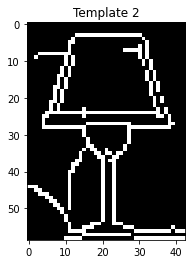

In [32]:
plt.imshow(template2, "gray")
plt.title('Template 2')

Text(0.5, 1.0, 'Template 3')

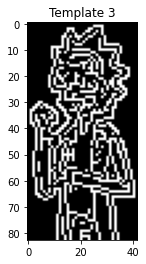

In [33]:
plt.imshow(template3, "gray")
plt.title('Template 3')

Text(0.5, 1.0, 'Template 4')

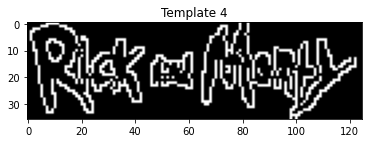

In [34]:
plt.imshow(template4, "gray")
plt.title('Template 4')

In [35]:
template1Sum, template1Pos = simplefindPos(image1M, template1)

In [36]:
template2Sum, template2Pos = simplefindPos(image2M, template2)

In [37]:
template3Sum, template3Pos = simplefindPos(image1M, template3)

In [38]:
template4Sum, template4Pos = simplefindPos(image1M, template4)

In [37]:
print(template1Pos)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
print(template2Pos)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Text(0.5, 1.0, 'Template pos 1')

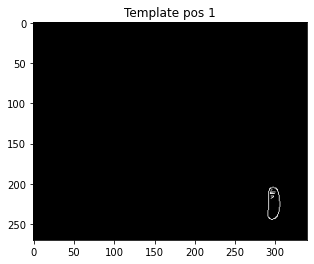

In [39]:
plt.imshow(template1Pos, "gray")
plt.title('Template pos 1')

Text(0.5, 1.0, 'Template pos 3')

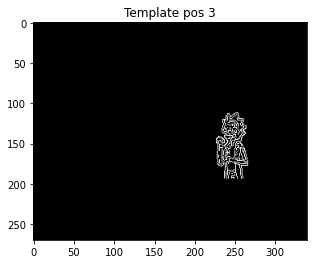

In [40]:
plt.imshow(template3Pos, "gray")
plt.title('Template pos 3')

Text(0.5, 1.0, 'Template pos 4')

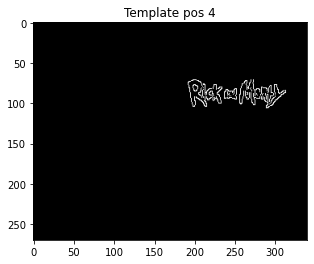

In [41]:
plt.imshow(template4Pos, "gray")
plt.title('Template pos 4')

Text(0.5, 1.0, 'Template pos 1')

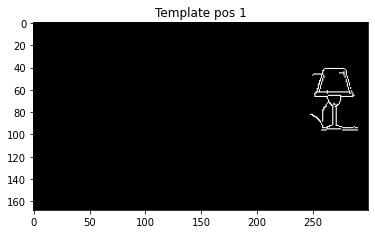

In [42]:
plt.imshow(template2Pos, "gray")
plt.title('Template pos 1')

In [43]:
image1template1 = connect(image1, template1Pos, template1Sum, template1)

In [44]:
image2template2 = connect(image2, template2Pos, template2Sum, template2)

In [45]:
image1template3 = connect(image1, template3Pos, template3Sum, template3)

In [46]:
image1template4 = connect(image1, template4Pos, template4Sum, template4)

Text(0.5, 1.0, 'image1template1')

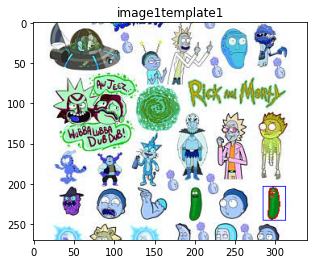

In [47]:
plt.imshow(image1template1)
plt.title('image1template1')

Text(0.5, 1.0, 'image2template2')

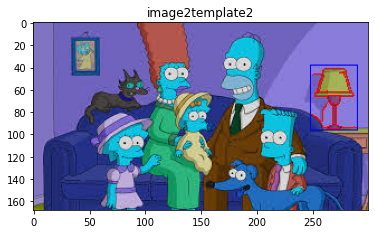

In [48]:
plt.imshow(image2template2)
plt.title('image2template2')

Text(0.5, 1.0, 'image1template3')

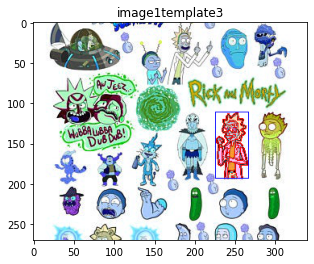

In [49]:
plt.imshow(image1template3)
plt.title('image1template3')

Text(0.5, 1.0, 'image1template4')

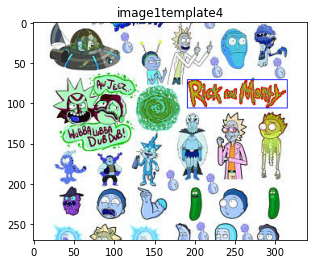

In [50]:
plt.imshow(image1template4)
plt.title('image1template4')

In [51]:
cv.imwrite('image1template1.png', np.array(image1template1))
cv.imwrite('image2template2.png', np.array(image2template2))
cv.imwrite('image1template3.png', np.array(image1template3))
cv.imwrite('image1template4.png', np.array(image1template4))
cv.imwrite('templateedge1.png', np.array(template1))
cv.imwrite('templateedge2.png', np.array(template2))
cv.imwrite('templateedge3.png', np.array(template3))
cv.imwrite('templateedge4.png', np.array(template4))

True